In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import options data
data = pd.read_csv("NDXP.csv").sort_values(by=['quote_date', 'strike']).reset_index(drop = True)
data['quote_date'] = pd.to_datetime(data['quote_date'])
data['expiration'] = pd.to_datetime(data['expiration'])
data

,quote_date,expiration,strike,option_type,bid_1545,ask_1545
0,2018-01-04,2018-02-02,6200.0,C,401.9,423.0
1,2018-01-04,2018-02-02,6200.0,P,11.8,16.0
2,2018-01-04,2018-02-09,6200.0,C,406.2,427.0
3,2018-01-04,2018-02-09,6200.0,P,18.7,23.0
4,2018-01-04,2018-02-23,6200.0,C,417.5,439.0
...,...,...,...,...,...,...
7226456,2022-12-30,2023-01-06,16000.0,P,5106.0,5122.1
7226457,2022-12-30,2023-01-13,16000.0,C,0.0,0.9
7226458,2022-12-30,2023-01-13,16000.0,P,5089.8,5106.2
7226459,2022-12-30,2023-01-27,16000.0,C,0.0,1.2


In [3]:
NDX_100 = pd.read_csv('NDX100_Data.csv')
NDX_100.rename(columns = {'Close/Last':'NDX_Exp'}, inplace = True)
NDX_100['Date'] = pd.to_datetime(NDX_100['Date'])
NDX_100

,Date,NDX_Exp
0,2024-01-05,16305.98
1,2024-01-04,16282.01
2,2024-01-03,16368.49
3,2024-01-02,16543.94
4,2023-12-29,16825.93
...,...,...
2530,2014-01-10,3565.08
2531,2014-01-09,3552.58
2532,2014-01-08,3567.54
2533,2014-01-07,3557.85


In [4]:
# import interest rate data
rates = pd.read_csv("DGS1MO.csv").ffill()
rates.replace('.', pd.NA, inplace=True)
rates.columns = ['date','rate']
rates['date'] = pd.to_datetime(rates['date'])
rates['rate'] = (pd.to_numeric(rates['rate'])/100).fillna(method='ffill')
rates

,date,rate
0,2018-01-02,0.0129
1,2018-01-03,0.0129
2,2018-01-04,0.0128
3,2018-01-05,0.0127
4,2018-01-08,0.0130
...,...,...
1299,2022-12-26,0.0380
1300,2022-12-27,0.0387
1301,2022-12-28,0.0386
1302,2022-12-29,0.0404


In [5]:
# second fridays between 2018 and 2022

all_fridays = pd.date_range(start="2018-01-01", end="2022-12-31", freq='W-FRI') ## all fridays in the period

second_fridays = [] # initialize second fridays list

for friday in all_fridays: # loop through every friday and determine if it is second friday
    month_start = pd.offsets.MonthBegin(1) # create a date offset to move friday to start of the month
    if len(pd.date_range(start = friday - month_start, end = friday, freq='W-FRI')) == 2: # if number of fridays since start of month is 2:
        second_fridays.append(friday)

second_fridays = pd.Series(second_fridays)
second_fridays

0    2018-01-12
1    2018-02-09
2    2018-03-09
3    2018-04-13
4    2018-05-11
5    2018-06-08
6    2018-07-13
7    2018-08-10
8    2018-09-14
9    2018-10-12
10   2018-11-09
11   2018-12-14
12   2019-01-11
13   2019-02-08
14   2019-03-08
15   2019-04-12
16   2019-05-10
17   2019-06-14
18   2019-07-12
19   2019-08-09
20   2019-09-13
21   2019-10-11
22   2019-11-08
23   2019-12-13
24   2020-01-10
25   2020-02-14
26   2020-03-13
27   2020-04-10
28   2020-05-08
29   2020-06-12
30   2020-07-10
31   2020-08-14
32   2020-09-11
33   2020-10-09
34   2020-11-13
35   2020-12-11
36   2021-01-08
37   2021-02-12
38   2021-03-12
39   2021-04-09
40   2021-05-14
41   2021-06-11
42   2021-07-09
43   2021-08-13
44   2021-09-10
45   2021-10-08
46   2021-11-12
47   2021-12-10
48   2022-01-14
49   2022-02-11
50   2022-03-11
51   2022-04-08
52   2022-05-13
53   2022-06-10
54   2022-07-08
55   2022-08-12
56   2022-09-09
57   2022-10-14
58   2022-11-11
59   2022-12-09
dtype: datetime64[ns]

In [6]:
# get second-friday expirations
second_fridays_series = pd.Series(second_fridays)
second_friday_data = data[data['expiration'].isin(second_fridays_series)]

# only get quotes that are one month before every expiration
second_friday_data = second_friday_data[(second_friday_data['expiration'] - second_friday_data['quote_date']).dt.days == 28].reset_index(drop = True)
second_friday_data

,quote_date,expiration,strike,option_type,bid_1545,ask_1545
0,2018-01-12,2018-02-09,5400.0,C,1347.00,1368.30
1,2018-01-12,2018-02-09,5400.0,P,0.05,3.10
2,2018-01-12,2018-02-09,5500.0,C,1248.00,1269.00
3,2018-01-12,2018-02-09,5500.0,P,0.25,3.70
4,2018-01-12,2018-02-09,5600.0,C,1151.60,1165.90
...,...,...,...,...,...,...
21791,2022-11-11,2022-12-09,14800.0,P,2939.00,2963.80
21792,2022-11-11,2022-12-09,14900.0,C,0.00,2.10
21793,2022-11-11,2022-12-09,14900.0,P,3038.60,3063.30
21794,2022-11-11,2022-12-09,15000.0,C,0.00,1.95


In [7]:
# Make sure bid < ask ( buy < sell)
second_friday_data = second_friday_data[second_friday_data['bid_1545'] < second_friday_data['ask_1545']]
second_friday_data

,quote_date,expiration,strike,option_type,bid_1545,ask_1545
0,2018-01-12,2018-02-09,5400.0,C,1347.00,1368.30
1,2018-01-12,2018-02-09,5400.0,P,0.05,3.10
2,2018-01-12,2018-02-09,5500.0,C,1248.00,1269.00
3,2018-01-12,2018-02-09,5500.0,P,0.25,3.70
4,2018-01-12,2018-02-09,5600.0,C,1151.60,1165.90
...,...,...,...,...,...,...
21791,2022-11-11,2022-12-09,14800.0,P,2939.00,2963.80
21792,2022-11-11,2022-12-09,14900.0,C,0.00,2.10
21793,2022-11-11,2022-12-09,14900.0,P,3038.60,3063.30
21794,2022-11-11,2022-12-09,15000.0,C,0.00,1.95


In [8]:
# organise puts and calls for each strike and date
calls = second_friday_data[second_friday_data['option_type'] == "C"]
puts = second_friday_data[second_friday_data['option_type'] == "P"]
merged_options = pd.merge(calls, puts, on=['quote_date', 'strike'], suffixes=('_C','_P'), how='inner')[['quote_date',
                                                                                                     'expiration_C',
                                                                                                     'strike',
                                                                                                     'bid_1545_C',
                                                                                                     'ask_1545_C',
                                                                                                     'bid_1545_P',
                                                                                                     'ask_1545_P']]


# get 1 month rates on each date
merged_data = pd.merge(merged_options, rates, left_on='quote_date', right_on='date', how='left')

# use put call parity to get underlying price
merged_data['implied_S'] = (merged_data['bid_1545_C'] + merged_data['ask_1545_C'])/2 + merged_data['strike']/((1+merged_data['rate'])**(1/12)) - (merged_data['bid_1545_P'] + merged_data['ask_1545_P'])/2
merged_data['distance_to_strike'] = merged_data['implied_S'] - merged_data['strike']
merged_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S,distance_to_strike
0,2018-01-12,2018-02-09,5400.0,1347.00,1368.30,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453
1,2018-01-12,2018-02-09,5500.0,1248.00,1269.00,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054
2,2018-01-12,2018-02-09,5600.0,1151.60,1165.90,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655
3,2018-01-12,2018-02-09,5700.0,1052.40,1066.70,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256
4,2018-01-12,2018-02-09,5800.0,953.10,967.40,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857
...,...,...,...,...,...,...,...,...,...,...,...
10893,2022-11-11,2022-12-09,14600.0,0.20,2.60,2740.00,2764.7,2022-11-11,0.0371,11804.796038,-2795.203962
10894,2022-11-11,2022-12-09,14700.0,0.10,2.40,2839.40,2864.2,2022-11-11,0.0371,11804.892928,-2895.107072
10895,2022-11-11,2022-12-09,14800.0,0.05,2.25,2939.00,2963.8,2022-11-11,0.0371,11804.889819,-2995.110181
10896,2022-11-11,2022-12-09,14900.0,0.00,2.10,3038.60,3063.3,2022-11-11,0.0371,11804.936710,-3095.063290


In [9]:
# might need to consider picking a single implied S (maybe one closest to at the money?)
def get_at_the_money(group): 
    return group.iloc[(group['distance_to_strike'].abs()).argmin()] # for each date, get most at the money strike
at_the_money_df = merged_data.groupby('quote_date').apply(get_at_the_money)[['quote_date', 'implied_S']] # pull out the calculated S for most at the money strike
at_the_money_df.reset_index(drop=True, inplace=True)
merged_data_new = pd.merge(merged_data, at_the_money_df, left_on='quote_date', right_on='quote_date', how='left')
merged_data_new

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y
0,2018-01-12,2018-02-09,5400.0,1347.00,1368.30,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453,6751.233067
1,2018-01-12,2018-02-09,5500.0,1248.00,1269.00,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067
2,2018-01-12,2018-02-09,5600.0,1151.60,1165.90,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067
3,2018-01-12,2018-02-09,5700.0,1052.40,1066.70,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067
4,2018-01-12,2018-02-09,5800.0,953.10,967.40,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067
...,...,...,...,...,...,...,...,...,...,...,...,...
10893,2022-11-11,2022-12-09,14600.0,0.20,2.60,2740.00,2764.7,2022-11-11,0.0371,11804.796038,-2795.203962,11805.333099
10894,2022-11-11,2022-12-09,14700.0,0.10,2.40,2839.40,2864.2,2022-11-11,0.0371,11804.892928,-2895.107072,11805.333099
10895,2022-11-11,2022-12-09,14800.0,0.05,2.25,2939.00,2963.8,2022-11-11,0.0371,11804.889819,-2995.110181,11805.333099
10896,2022-11-11,2022-12-09,14900.0,0.00,2.10,3038.60,3063.3,2022-11-11,0.0371,11804.936710,-3095.063290,11805.333099


In [10]:
NDX_select = NDX_100[NDX_100['Date'].isin(merged_data_new['quote_date'])]
NDX_select.set_index('Date', inplace=True)

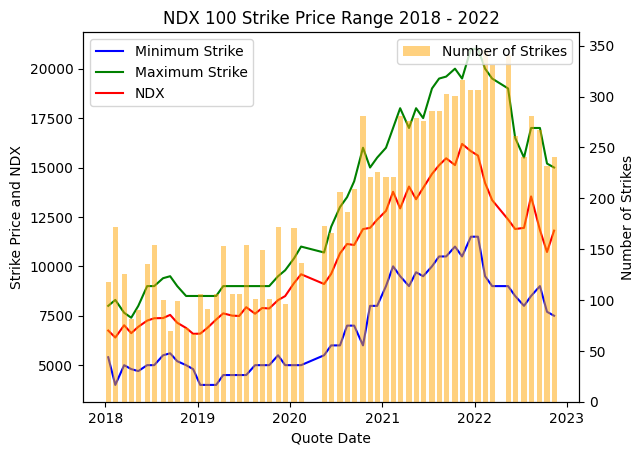

In [11]:
def strike_min(group):
    return group['strike'].min() # smallest strike on a given date

def strike_max(group):
    return group['strike'].max() # largest strike on a given date

def NDX(group):
    return group['implied_S_y'].max() # implied NDX on a given date

def group_length(group):
    return len(group)

fig, ax1 = plt.subplots()
ax1.plot(merged_data_new.groupby("quote_date").apply(strike_min), label="Minimum Strike", color='b')
ax1.plot(merged_data_new.groupby("quote_date").apply(strike_max), label="Maximum Strike", color='g')
ax1.plot(merged_data_new.groupby("quote_date").apply(NDX), label="NDX", color='r')
ax1.set_xlabel('Quote Date')
ax1.set_ylabel('Strike Price and NDX', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.legend(loc='upper left')
# Create a secondary y-axis for the bar graph
ax2 = ax1.twinx()
# Plot the bar graph on the secondary y-axis
ax2.bar(merged_data_new.groupby("quote_date").apply(lambda x: x.name), 
        merged_data_new.groupby("quote_date").apply(group_length), 
        label="Number of Strikes", color='orange', alpha=0.5, width=20)

ax2.set_ylabel('Number of Strikes', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc='upper right')
plt.title("NDX 100 Strike Price Range 2018 - 2022")
plt.show()


## Strike Ratio Approach

In [12]:
merged_data_new["adjusted_strike"] = np.round(merged_data_new["strike"]/merged_data_new["implied_S_y"],3)
merged_data_new

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike
0,2018-01-12,2018-02-09,5400.0,1347.00,1368.30,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453,6751.233067,0.800
1,2018-01-12,2018-02-09,5500.0,1248.00,1269.00,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067,0.815
2,2018-01-12,2018-02-09,5600.0,1151.60,1165.90,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067,0.829
3,2018-01-12,2018-02-09,5700.0,1052.40,1066.70,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067,0.844
4,2018-01-12,2018-02-09,5800.0,953.10,967.40,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067,0.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,2022-11-11,2022-12-09,14600.0,0.20,2.60,2740.00,2764.7,2022-11-11,0.0371,11804.796038,-2795.203962,11805.333099,1.237
10894,2022-11-11,2022-12-09,14700.0,0.10,2.40,2839.40,2864.2,2022-11-11,0.0371,11804.892928,-2895.107072,11805.333099,1.245
10895,2022-11-11,2022-12-09,14800.0,0.05,2.25,2939.00,2963.8,2022-11-11,0.0371,11804.889819,-2995.110181,11805.333099,1.254
10896,2022-11-11,2022-12-09,14900.0,0.00,2.10,3038.60,3063.3,2022-11-11,0.0371,11804.936710,-3095.063290,11805.333099,1.262


In [13]:
def adj_strike_min(group):
    return group['adjusted_strike'].min() # smallest adj strike on a given date

def adj_strike_max(group):
    return group['adjusted_strike'].max() # largest adj strike on a given date

subset_min = merged_data_new.groupby("quote_date").apply(adj_strike_min).max()
subset_max = merged_data_new.groupby("quote_date").apply(adj_strike_max).min()
print(subset_min, subset_max)

0.8 1.09


In [14]:
filtered_data = merged_data_new[(merged_data_new["adjusted_strike"] <= subset_max) & (merged_data_new["adjusted_strike"] >= subset_min)]
filtered_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike
0,2018-01-12,2018-02-09,5400.0,1347.0,1368.3,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453,6751.233067,0.800
1,2018-01-12,2018-02-09,5500.0,1248.0,1269.0,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067,0.815
2,2018-01-12,2018-02-09,5600.0,1151.6,1165.9,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067,0.829
3,2018-01-12,2018-02-09,5700.0,1052.4,1066.7,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067,0.844
4,2018-01-12,2018-02-09,5800.0,953.1,967.4,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067,0.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,2022-11-11,2022-12-09,12750.0,58.8,61.6,957.50,976.8,2022-11-11,0.0371,11804.403560,-945.596440,11805.333099,1.080
10838,2022-11-11,2022-12-09,12775.0,55.4,58.3,976.90,998.5,2022-11-11,0.0371,11805.427783,-969.572217,11805.333099,1.082
10839,2022-11-11,2022-12-09,12800.0,52.2,55.0,1000.60,1020.3,2022-11-11,0.0371,11804.352006,-995.647994,11805.333099,1.084
10840,2022-11-11,2022-12-09,12825.0,49.1,52.0,1020.20,1042.2,2022-11-11,0.0371,11805.476228,-1019.523772,11805.333099,1.086


In [15]:
n_strikes = filtered_data.groupby("quote_date").apply(group_length).min()
n_strikes

41

In [16]:
def get_sample(group):
     return group.sample(n=n_strikes, replace = False)

sampled_data = filtered_data.groupby("quote_date").apply(get_sample).reset_index(drop = True).sort_values(by = ['quote_date', 'strike']).reset_index(drop = True)
sampled_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike
0,2018-01-12,2018-02-09,5400.0,1347.0,1368.3,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453,6751.233067,0.800
1,2018-01-12,2018-02-09,5500.0,1248.0,1269.0,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067,0.815
2,2018-01-12,2018-02-09,5600.0,1151.6,1165.9,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067,0.829
3,2018-01-12,2018-02-09,5700.0,1052.4,1066.7,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067,0.844
4,2018-01-12,2018-02-09,6075.0,682.2,696.3,5.90,8.6,2018-01-12,0.0131,6750.414760,675.414760,6751.233067,0.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,2022-11-11,2022-12-09,12375.0,135.4,140.0,661.40,677.8,2022-11-11,0.0371,11805.590220,-569.409780,11805.333099,1.048
2292,2022-11-11,2022-12-09,12625.0,78.5,81.9,851.60,871.6,2022-11-11,0.0371,11805.332447,-819.667553,11805.333099,1.069
2293,2022-11-11,2022-12-09,12650.0,74.2,77.5,873.40,892.2,2022-11-11,0.0371,11804.706670,-845.293330,11805.333099,1.072
2294,2022-11-11,2022-12-09,12775.0,55.4,58.3,976.90,998.5,2022-11-11,0.0371,11805.427783,-969.572217,11805.333099,1.082


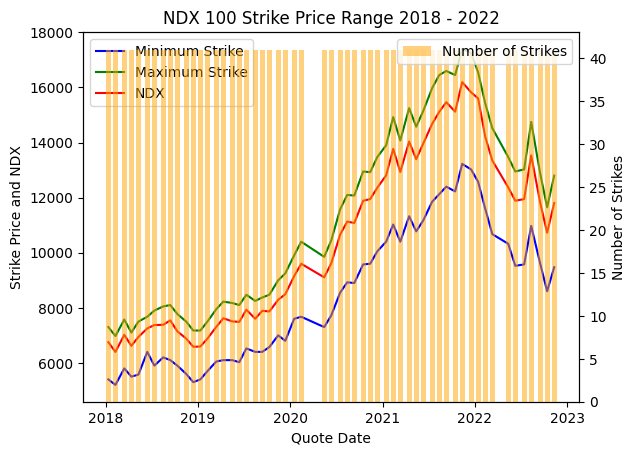

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(sampled_data.groupby("quote_date").apply(strike_min), label="Minimum Strike", color='b')
ax1.plot(sampled_data.groupby("quote_date").apply(strike_max), label="Maximum Strike", color='g')
ax1.plot(sampled_data.groupby("quote_date").apply(NDX), label="NDX", color='r')
ax1.set_xlabel('Quote Date')
ax1.set_ylabel('Strike Price and NDX', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.legend(loc='upper left')
# Create a secondary y-axis for the bar graph
ax2 = ax1.twinx()
# Plot the bar graph on the secondary y-axis
ax2.bar(sampled_data.groupby("quote_date").apply(lambda x: x.name), 
        sampled_data.groupby("quote_date").apply(group_length), 
        label="Number of Strikes", color='orange', alpha=0.5, width=20)

ax2.set_ylabel('Number of Strikes', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc='upper right')
plt.title("NDX 100 Strike Price Range 2018 - 2022")
plt.show()

## Simple Sample Approach

In [18]:
n_strikes = merged_data_new.groupby("quote_date").apply(group_length).min()
n_strikes

67

In [19]:
def get_sample(group):
     return group.sample(n=n_strikes, replace = False)

sampled_data = merged_data_new.groupby("quote_date").apply(get_sample).reset_index(drop = True).sort_values(by = ['quote_date', 'strike']).reset_index(drop = True)
sampled_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike
0,2018-01-12,2018-02-09,5500.0,1248.0,1269.0,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067,0.815
1,2018-01-12,2018-02-09,5600.0,1151.6,1165.9,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067,0.829
2,2018-01-12,2018-02-09,5900.0,854.5,868.8,3.40,6.2,2018-01-12,0.0131,6750.454458,850.454458,6751.233067,0.874
3,2018-01-12,2018-02-09,6000.0,756.1,770.3,4.70,7.5,2018-01-12,0.0131,6750.596059,750.596059,6751.233067,0.889
4,2018-01-12,2018-02-09,6025.0,731.5,745.7,5.10,7.9,2018-01-12,0.0131,6750.568959,725.568959,6751.233067,0.892
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,2022-11-11,2022-12-09,13875.0,3.4,5.9,2020.30,2044.9,2022-11-11,0.0371,11804.993580,-2070.006420,11805.333099,1.175
3748,2022-11-11,2022-12-09,13925.0,2.9,5.5,2069.70,2094.4,2022-11-11,0.0371,11804.942026,-2120.057974,11805.333099,1.180
3749,2022-11-11,2022-12-09,13975.0,2.5,5.1,2119.60,2144.0,2022-11-11,0.0371,11804.640471,-2170.359529,11805.333099,1.184
3750,2022-11-11,2022-12-09,14000.0,2.3,4.9,2144.40,2168.7,2022-11-11,0.0371,11804.614694,-2195.385306,11805.333099,1.186


In [20]:
sampled_data['ranked_strikes'] = sampled_data.groupby('quote_date')['strike'].rank(method='dense').astype(int)
sampled_data

,quote_date,expiration_C,strike,bid_1545_C,ask_1545_C,bid_1545_P,ask_1545_P,date,rate,implied_S_x,distance_to_strike,implied_S_y,adjusted_strike,ranked_strikes
0,2018-01-12,2018-02-09,5500.0,1248.0,1269.0,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067,0.815,1
1,2018-01-12,2018-02-09,5600.0,1151.6,1165.9,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067,0.829,2
2,2018-01-12,2018-02-09,5900.0,854.5,868.8,3.40,6.2,2018-01-12,0.0131,6750.454458,850.454458,6751.233067,0.874,3
3,2018-01-12,2018-02-09,6000.0,756.1,770.3,4.70,7.5,2018-01-12,0.0131,6750.596059,750.596059,6751.233067,0.889,4
4,2018-01-12,2018-02-09,6025.0,731.5,745.7,5.10,7.9,2018-01-12,0.0131,6750.568959,725.568959,6751.233067,0.892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,2022-11-11,2022-12-09,13875.0,3.4,5.9,2020.30,2044.9,2022-11-11,0.0371,11804.993580,-2070.006420,11805.333099,1.175,63
3748,2022-11-11,2022-12-09,13925.0,2.9,5.5,2069.70,2094.4,2022-11-11,0.0371,11804.942026,-2120.057974,11805.333099,1.180,64
3749,2022-11-11,2022-12-09,13975.0,2.5,5.1,2119.60,2144.0,2022-11-11,0.0371,11804.640471,-2170.359529,11805.333099,1.184,65
3750,2022-11-11,2022-12-09,14000.0,2.3,4.9,2144.40,2168.7,2022-11-11,0.0371,11804.614694,-2195.385306,11805.333099,1.186,66


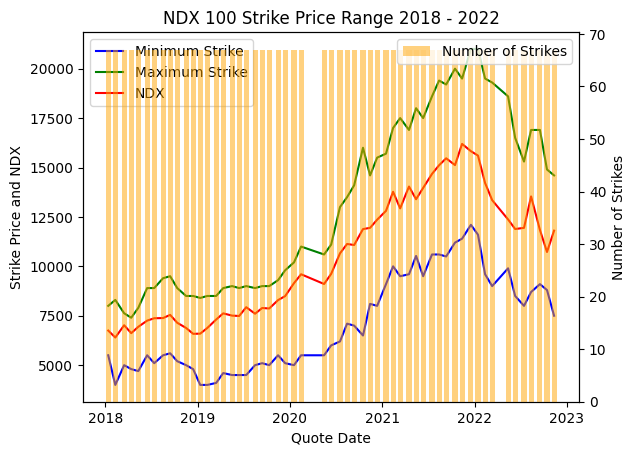

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(sampled_data.groupby("quote_date").apply(strike_min), label="Minimum Strike", color='b')
ax1.plot(sampled_data.groupby("quote_date").apply(strike_max), label="Maximum Strike", color='g')
ax1.plot(sampled_data.groupby("quote_date").apply(NDX), label="NDX", color='r')
ax1.set_xlabel('Quote Date')
ax1.set_ylabel('Strike Price and NDX', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.legend(loc='upper left')
# Create a secondary y-axis for the bar graph
ax2 = ax1.twinx()
# Plot the bar graph on the secondary y-axis
ax2.bar(sampled_data.groupby("quote_date").apply(lambda x: x.name), 
        sampled_data.groupby("quote_date").apply(group_length), 
        label="Number of Strikes", color='orange', alpha=0.5, width=20)

ax2.set_ylabel('Number of Strikes', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc='upper right')
plt.title("NDX 100 Strike Price Range 2018 - 2022")
plt.show()

In [22]:
sampled_data_new = pd.merge(left = sampled_data, right = NDX_100, left_on = 'expiration_C', right_on = 'Date', how = 'left')
sampled_data_new['PNL_C'] = np.maximum(sampled_data_new['NDX_Exp'] - sampled_data_new['strike'],0) - (sampled_data_new['bid_1545_C'])
sampled_data_new['PNL_P'] = np.maximum(sampled_data_new['strike'] - sampled_data_new['NDX_Exp'],0) - (sampled_data_new['bid_1545_P'])
sampled_data_new['PNL_C_S'] = -np.maximum(sampled_data_new['NDX_Exp'] - sampled_data_new['strike'],0) + (sampled_data_new['ask_1545_C'])
sampled_data_new['PNL_P_S'] = -np.maximum(sampled_data_new['strike'] - sampled_data_new['NDX_Exp'],0) + (sampled_data_new['ask_1545_P'])
PNL_data = sampled_data_new[['quote_date',
                             'strike',
                             'ranked_strikes',
                             'implied_S_y',
                             'NDX_Exp',
                             'PNL_C',
                             'PNL_P',
                             'PNL_C_S',
                             'PNL_P_S']]
PNL_data

,quote_date,strike,ranked_strikes,implied_S_y,NDX_Exp,PNL_C,PNL_P,PNL_C_S,PNL_P_S
0,2018-01-12,5500.0,1,6751.233067,6412.68,-335.32,-0.25,356.32,3.70
1,2018-01-12,5600.0,2,6751.233067,6412.68,-338.92,-0.65,353.22,4.20
2,2018-01-12,5900.0,3,6751.233067,6412.68,-341.82,-3.40,356.12,6.20
3,2018-01-12,6000.0,4,6751.233067,6412.68,-343.42,-4.70,357.62,7.50
4,2018-01-12,6025.0,5,6751.233067,6412.68,-343.82,-5.10,358.02,7.90
...,...,...,...,...,...,...,...,...,...
3747,2022-11-11,13875.0,63,11805.333099,11563.33,-3.40,291.37,5.90,-266.77
3748,2022-11-11,13925.0,64,11805.333099,11563.33,-2.90,291.97,5.50,-267.27
3749,2022-11-11,13975.0,65,11805.333099,11563.33,-2.50,292.07,5.10,-267.67
3750,2022-11-11,14000.0,66,11805.333099,11563.33,-2.30,292.27,4.90,-267.97


In [23]:
call_PNL = PNL_data.pivot(index='quote_date', columns='ranked_strikes', values='PNL_C')
put_PNL = PNL_data.pivot(index='quote_date', columns='ranked_strikes', values='PNL_P')
call_S_PNL = PNL_data.pivot(index='quote_date', columns='ranked_strikes', values='PNL_C_S')
put_S_PNL = PNL_data.pivot(index='quote_date', columns='ranked_strikes', values='PNL_P_S') 
call_PNL.columns = [f"{col}_C" for col in call_PNL.columns]
put_PNL.columns = [f"{col}_P" for col in put_PNL.columns]
call_S_PNL.columns = [f"{col}_C_S" for col in call_S_PNL.columns]
put_S_PNL.columns = [f"{col}_P_S" for col in put_S_PNL.columns]
option_PNL = pd.merge(call_PNL , put_PNL, left_on = 'quote_date', right_on = 'quote_date')
option_PNL = pd.merge(option_PNL , call_S_PNL, left_on = 'quote_date', right_on = 'quote_date')
option_PNL = pd.merge(option_PNL , put_S_PNL, left_on = 'quote_date', right_on = 'quote_date')
option_PNL

,1_C,2_C,3_C,4_C,5_C,6_C,7_C,8_C,9_C,10_C,...,58_P_S,59_P_S,60_P_S,61_P_S,62_P_S,63_P_S,64_P_S,65_P_S,66_P_S,67_P_S
quote_date,,,,,,,,,,,,,,,,,,,,,
2018-01-12,-335.32,-338.92,-341.82,-343.42,-343.82,-344.22,-344.52,-345.32,-345.92,-347.72,...,-335.12,-336.02,-336.62,-333.32,-334.32,-335.32,-335.42,-336.32,-336.32,-336.82
2018-02-09,708.08,705.18,702.88,697.98,695.78,692.98,689.98,676.98,675.38,673.68,...,705.58,705.48,704.58,704.38,704.28,704.18,703.88,703.78,703.78,702.58
2018-03-16,-388.76,-395.06,-395.76,-396.46,-398.66,-402.16,-405.86,-407.16,-408.66,-409.56,...,-374.66,-375.96,-377.56,-379.16,-387.36,-391.56,-393.16,-394.16,-394.46,-395.66
2018-04-13,332.06,331.06,330.56,329.26,327.06,325.36,323.16,320.36,312.06,305.46,...,260.10,277.40,295.20,313.90,353.40,351.66,348.06,333.36,331.46,330.36
2018-05-11,214.82,214.02,213.52,213.52,212.62,213.12,213.02,212.72,212.52,212.42,...,144.40,191.00,208.70,211.62,207.62,211.82,211.02,210.52,210.12,209.82
2018-06-15,118.32,117.42,115.32,111.22,108.72,104.82,104.52,103.92,103.72,103.32,...,118.22,117.32,116.22,115.72,115.92,114.92,114.52,114.52,114.02,113.72
2018-07-13,36.80,36.40,36.20,35.90,35.20,34.80,33.70,33.00,28.40,22.30,...,37.20,35.50,32.50,32.30,31.80,31.60,31.10,30.70,30.50,30.10
2018-08-17,163.60,163.10,162.60,162.00,159.40,159.40,154.20,153.70,151.00,150.30,...,159.80,159.70,159.60,159.10,158.90,158.70,158.40,158.20,158.00,157.80
2018-09-14,-386.09,-386.49,-386.89,-387.29,-387.79,-388.29,-388.99,-389.69,-391.79,-393.29,...,-390.59,-390.89,-391.09,-391.59,-391.79,-391.99,-392.19,-392.49,-392.69,-392.89


In [24]:
option_PNL.corr()

,1_C,2_C,3_C,4_C,5_C,6_C,7_C,8_C,9_C,10_C,...,58_P_S,59_P_S,60_P_S,61_P_S,62_P_S,63_P_S,64_P_S,65_P_S,66_P_S,67_P_S
1_C,1.000000,0.999973,0.999959,0.999947,0.999922,0.999871,0.999792,0.999729,0.999652,0.999490,...,0.997977,0.998754,0.999477,0.999707,0.999757,0.999886,0.999907,0.999925,0.999924,0.999922
2_C,0.999973,1.000000,0.999990,0.999983,0.999965,0.999930,0.999865,0.999818,0.999751,0.999611,...,0.997918,0.998702,0.999428,0.999661,0.999714,0.999846,0.999865,0.999879,0.999877,0.999875
3_C,0.999959,0.999990,1.000000,0.999996,0.999986,0.999961,0.999905,0.999866,0.999807,0.999684,...,0.997871,0.998660,0.999383,0.999619,0.999674,0.999805,0.999821,0.999830,0.999828,0.999825
4_C,0.999947,0.999983,0.999996,1.000000,0.999994,0.999975,0.999927,0.999893,0.999837,0.999718,...,0.997827,0.998623,0.999357,0.999595,0.999651,0.999785,0.999801,0.999811,0.999809,0.999807
5_C,0.999922,0.999965,0.999986,0.999994,1.000000,0.999990,0.999951,0.999923,0.999873,0.999770,...,0.997793,0.998587,0.999316,0.999551,0.999605,0.999740,0.999757,0.999767,0.999765,0.999763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63_P_S,0.999886,0.999846,0.999805,0.999785,0.999740,0.999661,0.999544,0.999462,0.999348,0.999143,...,0.998205,0.998946,0.999656,0.999874,0.999948,1.000000,0.999995,0.999961,0.999960,0.999955
64_P_S,0.999907,0.999865,0.999821,0.999801,0.999757,0.999678,0.999562,0.999478,0.999365,0.999159,...,0.998140,0.998896,0.999621,0.999847,0.999922,0.999995,1.000000,0.999979,0.999978,0.999975
65_P_S,0.999925,0.999879,0.999830,0.999811,0.999767,0.999685,0.999571,0.999485,0.999369,0.999162,...,0.998011,0.998789,0.999548,0.999780,0.999842,0.999961,0.999979,1.000000,0.999999,0.999999
66_P_S,0.999924,0.999877,0.999828,0.999809,0.999765,0.999684,0.999569,0.999483,0.999368,0.999160,...,0.998023,0.998798,0.999552,0.999781,0.999839,0.999960,0.999978,0.999999,1.000000,0.999999


In [25]:
option_PNL.to_csv("option_PNL.csv")